<a href="https://colab.research.google.com/github/AhmedHeshamSakr/ML-Models-Comparison-and-Evaluation-/blob/main/Perceptron_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
!pip install seaborn
!pip install scikit-learn

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 71.0MB/s]


In [ ]:
import zipfile


file_path = '/content/titanic.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle/titanic')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
!pip install seaborn
!pip install scikit-learn

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')


In [ ]:
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<ipython-input-7-2f428ec4661c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="inferno")


<Axes: >

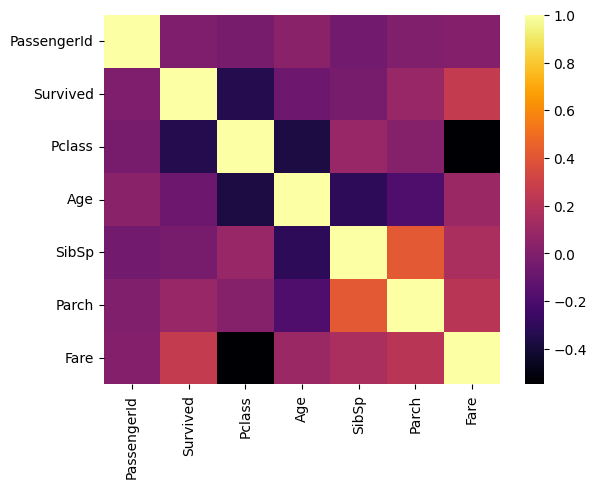

In [ ]:
sns.heatmap(titanic_data.corr(), cmap="inferno")

In [ ]:
# Define features and labels
features = titanic_data.drop('Survived', axis=1)
labels = titanic_data['Survived']

#the first split (training and test)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_indices, test_indices in splitter.split(features, labels):
    train_set = titanic_data.loc[train_indices]
    test_set = titanic_data.loc[test_indices]

#split the training set into training and validation
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_indices, valid_indices in splitter.split(train_set, train_set[["Survived", "Pclass", "Sex"]]):
    train_set = titanic_data.loc[train_indices]
    valid_set = titanic_data.loc[valid_indices]

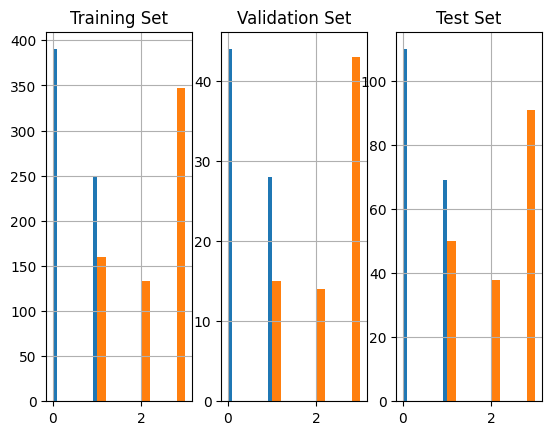

In [ ]:
plt.subplot(1, 3, 1)
train_set['Survived'].hist()
train_set['Pclass'].hist()
plt.title('Training Set')

plt.subplot(1, 3, 2)
valid_set['Survived'].hist()
valid_set['Pclass'].hist()
plt.title('Validation Set')

plt.subplot(1, 3, 3)
test_set['Survived'].hist()
test_set['Pclass'].hist()
plt.title('Test Set')

plt.show()


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 581 to 355
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  640 non-null    int64  
 1   Survived     640 non-null    int64  
 2   Pclass       640 non-null    int64  
 3   Name         640 non-null    object 
 4   Sex          640 non-null    object 
 5   Age          510 non-null    float64
 6   SibSp        640 non-null    int64  
 7   Parch        640 non-null    int64  
 8   Ticket       640 non-null    object 
 9   Fare         640 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     639 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 65.0+ KB


In [ ]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


In [ ]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):

        # One-hot encode 'Sex' column
        sex_encoder = OneHotEncoder()
        sex_matrix = sex_encoder.fit_transform(X[['Sex']]).toarray()
        sex_column_names = ["Female", "Male"]

        for i in range(len(sex_matrix.T)):
            X[sex_column_names[i]] = sex_matrix.T[i]


        return X

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin) :
    def fit (self, X, Y=None) :
        return self
    def transform (self, X) :
        return X.drop (["Embarked", "Name", "Ticket", "Cabin", "Sex", "N", "PassengerId"], axis=1 , errors="ignore" )

In [ ]:
preprocessing_pipeline = Pipeline([
    ("AgeImputer", AgeImputer()),
    ("FeatureEncoder", FeatureEncoder()),
    ("FeatureDropper", FeatureDropper()),
    ("Scaler", StandardScaler())
])

In [ ]:
X_train_processed = preprocessing_pipeline.fit_transform(train_set)
X_valid_processed = preprocessing_pipeline.transform(valid_set)
X_test_processed = preprocessing_pipeline.transform(test_set)

In [ ]:
#training
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']
y_train_data = y_train.to_numpy()

#validation
X_valid = valid_set.drop(['Survived'], axis=1)
y_valid = valid_set['Survived']
y_valid_data = y_valid.to_numpy()

#test
X_test = test_set.drop(['Survived'], axis=1)
y_test = test_set['Survived']
y_test_data = y_test.to_numpy()


X_train_data = preprocessing_pipeline.fit_transform(X_train)
X_valid_data = preprocessing_pipeline.transform(X_valid)
X_test_data = preprocessing_pipeline.transform(X_test)


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

class MultiLayerPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, n_hidden_neurons=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.n_hidden_neurons = n_hidden_neurons
        self.weights_hidden = None
        self.weights_output = None
        self.bias_hidden = None
        self.bias_output = None


    def fit(self, X_train, y_train, X_valid=None, y_valid=None):
        n_samples, n_features = X_train.shape

        # Initialize weights and biases
        self.weights_hidden = np.random.rand(n_features, self.n_hidden_neurons)
        self.weights_output = np.random.rand(self.n_hidden_neurons, 1)
        self.bias_hidden = np.zeros((1, self.n_hidden_neurons))
        self.bias_output = np.zeros((1, 1))

        y_train = y_train.reshape(-1, 1)

        # Lists to store training and validation losses for each iteration
        training_losses = []
        validation_losses = []
        training_accuracies = []
        validation_accuracies = []

        # Training algorithm
        for iteration in range(self.n_iters):
            # Forward pass
            hidden_layer_activation = sigmoid(np.dot(X_train, self.weights_hidden) + self.bias_hidden)
            output_layer_activation = sigmoid(np.dot(hidden_layer_activation, self.weights_output) + self.bias_output)

            # Backpropagation
            error = y_train - output_layer_activation
            d_output = error * sigmoid_derivative(output_layer_activation)
            error_hidden_layer = d_output.dot(self.weights_output.T)
            d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

            # Updating Weights and Biases
            self.weights_output += hidden_layer_activation.T.dot(d_output) * self.lr
            self.bias_output += np.sum(d_output, axis=0, keepdims=True) * self.lr
            self.weights_hidden += X_train.T.dot(d_hidden_layer) * self.lr
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.lr

            # Calculate and store training loss
            training_loss = np.mean((y_train - output_layer_activation) ** 2)
            training_losses.append(training_loss)

            # Calculate and store validation loss if validation set is provided
            if X_valid is not None and y_valid is not None:
                output_valid = self.predict_proba(X_valid)
                validation_loss = np.mean((y_valid - output_valid) ** 2)
                validation_losses.append(validation_loss)

            # Calculate and store training accuracy
            predictions_train = self.predict(X_train)
            training_accuracy = accuracy(y_train.ravel(), predictions_train.ravel())
            training_accuracies.append(training_accuracy)

            # Calculate and store validation accuracy if validation set is provided
            if X_valid is not None and y_valid is not None:
                predictions_valid = self.predict(X_valid)
                validation_accuracy = accuracy(y_valid.ravel(), predictions_valid.ravel())
                validation_accuracies.append(validation_accuracy)

            # Print or log training progress
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Training Loss: {training_loss}, Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}")

        return self, training_losses, validation_losses, training_accuracies, validation_accuracies


    def predict(self, X):
        hidden_layer_activation = sigmoid(np.dot(X, self.weights_hidden) + self.bias_hidden)
        output_layer_activation = sigmoid(np.dot(hidden_layer_activation, self.weights_output) + self.bias_output)
        return np.where(output_layer_activation > 0.5, 1, 0)

    def predict_proba(self, X):
        hidden_layer_activation = sigmoid(np.dot(X, self.weights_hidden) + self.bias_hidden)
        output_layer_activation = sigmoid(np.dot(hidden_layer_activation, self.weights_output) + self.bias_output)
        return output_layer_activation





In [ ]:
mlp = MultiLayerPerceptron(learning_rate=0.1, n_iters=1000, n_hidden_neurons=3)
mlp.fit(X_train_data, y_train_data, X_valid_data, y_valid_data)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# No need to use .values for NumPy array
y_test_np = y_test_data.ravel()

predictions = mlp.predict(X_test_data)
print("MLP Classification Accuracy:", accuracy(y_test_np, predictions))


Iteration 0, Training Loss: 0.3043756628932034, Training Accuracy: 0.609375, Validation Accuracy: 0.6111111111111112
Iteration 100, Training Loss: 0.14820280932863938, Training Accuracy: 0.8, Validation Accuracy: 0.8055555555555556
Iteration 200, Training Loss: 0.1402942130814889, Training Accuracy: 0.8109375, Validation Accuracy: 0.8333333333333334
Iteration 300, Training Loss: 0.13747285259975972, Training Accuracy: 0.8125, Validation Accuracy: 0.8333333333333334
Iteration 400, Training Loss: 0.13593196591631354, Training Accuracy: 0.81875, Validation Accuracy: 0.8333333333333334
Iteration 500, Training Loss: 0.135001473099456, Training Accuracy: 0.8203125, Validation Accuracy: 0.8333333333333334
Iteration 600, Training Loss: 0.1344213258338416, Training Accuracy: 0.8203125, Validation Accuracy: 0.8333333333333334
Iteration 700, Training Loss: 0.13407403259062095, Training Accuracy: 0.8203125, Validation Accuracy: 0.8194444444444444
Iteration 800, Training Loss: 0.13387759079837624, 

In [ ]:
mlp = MultiLayerPerceptron(learning_rate=0.1, n_iters=1000, n_hidden_neurons=3)
mlp.fit(X_train_data, y_train_data, X_valid_data, y_valid_data)

# No need to use .values for NumPy array
y_test_np = y_test_data.ravel()

predictions = mlp.predict(X_test_data)
print("MLP Classification Accuracy:", accuracy(y_test_np, predictions))


Iteration 0, Training Loss: 0.27880337919853093, Training Accuracy: 0.609375, Validation Accuracy: 0.6111111111111112
Iteration 100, Training Loss: 0.15086109031514255, Training Accuracy: 0.8, Validation Accuracy: 0.8055555555555556
Iteration 200, Training Loss: 0.14449482692394003, Training Accuracy: 0.796875, Validation Accuracy: 0.7916666666666666
Iteration 300, Training Loss: 0.14260392660974003, Training Accuracy: 0.7953125, Validation Accuracy: 0.7916666666666666
Iteration 400, Training Loss: 0.14140116530155394, Training Accuracy: 0.7953125, Validation Accuracy: 0.8055555555555556
Iteration 500, Training Loss: 0.14052937254206652, Training Accuracy: 0.7953125, Validation Accuracy: 0.8055555555555556
Iteration 600, Training Loss: 0.13990763552268937, Training Accuracy: 0.790625, Validation Accuracy: 0.7916666666666666
Iteration 700, Training Loss: 0.13945305677674708, Training Accuracy: 0.7953125, Validation Accuracy: 0.7916666666666666
Iteration 800, Training Loss: 0.13910934635

In [ ]:
print("Shapes:", y_test_data.shape, len(predictions))
# Evaluate the model on the validation set
Accuracy = accuracy_score(y_test_data, predictions)
print(f'Accuracy on the testing set: {Accuracy:.2f}')
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_data, predictions))
print("\nClassification Report:")
print(classification_report(y_test_data, predictions))

Shapes: (179,) 179
Accuracy on the testing set: 0.83
Confusion Matrix:
[[92 18]
 [13 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.76      0.81      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



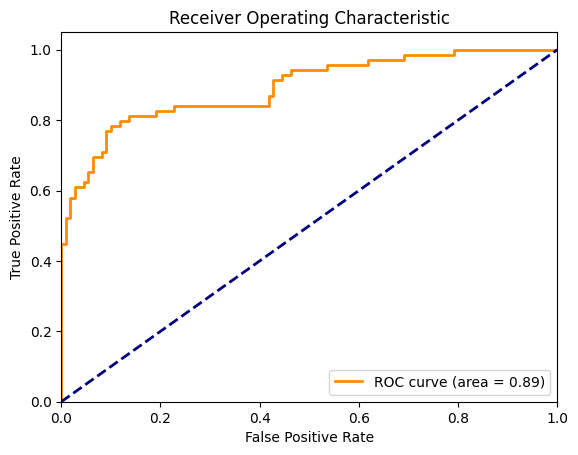

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming mlp is already fitted with your training data
probabilities = mlp.predict_proba(X_test_data).ravel()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_data, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()